# Numerical and Automatic Derivatives [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ua-2025q3-astr501-513/ua-2025q3-astr501-513.github.io/blob/main/513/05/notes.ipynb)

Derivatives are fundamental in mathematical modeling because they
quantify rates of change.
They provide insight into how physical systems evolve, how signals
vary, and how models respond to inputs.

In computational physics, engineering, and machine learning, the
efficient and accurate computation of derivatives is essential.
We rely on derivatives for simulations, optimization, and sensitivity
analysis.

For simple functions, derivatives can often be computed analytically.
But in real applications, functions are frequently nonlinear,
high-dimensional, or too complex for manual differentiation.
In these cases, alternative computational techniques become
indispensable.

### Definition of the Derivative

The derivative of a real-valued function $f(x)$ at a point $x=a$ is
defined as the limit
\begin{align}
  f'(a) \equiv \lim_{h\rightarrow 0}
  \frac{f(a+h) - f(a)}{h}
\end{align}

If this limit exists, it represents the slope of the tangent line to
the curve $y=f(x)$ at $x=a$.
More generally, the derivative function $f'(x)$ describes the local
rate of change of $f(x)$.

### Chain Rule

One of the most important rules in calculus is the chain rule.
For a composite function $f(x) = g(h(x))$,
\begin{align}
  f'(x) = g'(h(x)) h'(x).
\end{align}
The chain rule is not just a basic calculus identity.
It is the central principle behind modern computational approaches to
derivatives.
As we will see, both numerical differentiation schemes and automatic
differentiation rely heavily on repeated applications of this rule.


### Approaches to Computing Derivatives

There are three main approaches to computing derivatives in practice:
1. Symbolic differentiation
   Applies algebraic rules directly to mathematical expressions,
   producing exact formulas.
   (This is what you do in calculus class.)
2. Numerical differentiation
   Uses finite differences to approximate derivatives from discrete
   function values.
   These methods are easy to implement but introduce truncation and
   round-off errors.
3. Automatic differentiation (AD)
   Systematically applies the chain rule at the level of elementary
   operations.
   AD computes derivatives to machine precision without symbolic
   algebra, making it efficient for complex functions and large-scale
   systems.


## Symbolic Differentiation

Symbolic differentiation computes derivatives by applying calculus
rules directly to symbolic expressions.
Unlike numerical methods that we will see later, which only
approximate derivatives at specific points, symbolic methods yield
exact analytical expressions.
This makes them valuable for theoretical analysis, closed-form
solutions, and precise computation.

The basic algorithm for symbolic differentiation can be described in
three steps:
1. Parse the expression:
   Represent the function as a tree (nodes are operations like `+`,
   `*`, `sin`, etc.).
2. Apply differentiation rules:
   Recursively apply rules (e.g., product rule, chain rule) to each
   node.
3. Simplify:
   Reduce the resulting expression into a cleaner, more efficient
   form.


Consider the function $f(x) = x^2 \sin(x) + e^{2x}$.
To compute $f'(x)$, a symbolic differentiation system would:
1. Differentiate $x^2 \sin(x)$ using the product rule:
   \begin{align}
   \frac{d}{dx}[x^2 \sin(x)] = x^2 \cos(x) + 2 x \sin(x)
   \end{align}
2. Differentiate $e^{2x}$ using the chain rule:
   \begin{align}
   \frac{d}{dx}[e^{2x}] = 2 e^{2x}
   \end{align}
3. Combine the results:
   \begin{align}
   f'(x) = x^2 \cos(x) + 2 x \sin(x) + 2 e^{2x}
   \end{align}

### Symbolic Differentiation with SymPy

We can use [SymPy](https://www.sympy.org), a Python library for
symbolic mathematics, to automate this process.

In [1]:
!pip install sympy

In [2]:
import sympy as sp

# Define symbolic variable and function
x = sp.symbols('x')
f = x**2 * sp.sin(x) + sp.exp(2*x)

# Differentiate
fp = sp.diff(f, x)

# Simplify result
fp_simplified = sp.simplify(fp)

# Display the result with equation support
display(f)
display(fp_simplified)

x**2*sin(x) + exp(2*x)

x**2*cos(x) + 2*x*sin(x) + 2*exp(2*x)

SymPy can compute higher-order derivatives just as easily:

In [3]:
fpp  = sp.diff(f, x, 2)  # second derivative
fppp = sp.diff(f, x, 3)  # third derivative

fpp_simplified  = sp.simplify(fpp)
fppp_simplified = sp.simplify(fppp)

display(fpp_simplified)
display(fppp_simplified)

-x**2*sin(x) + 4*x*cos(x) + 4*exp(2*x) + 2*sin(x)

-x**2*cos(x) - 6*x*sin(x) + 8*exp(2*x) + 6*cos(x)

We can visualize the function and its derivatives:

In [4]:
import numpy as np

# Convert sympy expression into numpy-callable functions
f_num    = sp.lambdify(x, f,               "numpy")
fp_num   = sp.lambdify(x, fp_simplified,   "numpy")
fpp_num  = sp.lambdify(x, fpp_simplified,  "numpy")
fppp_num = sp.lambdify(x, fppp_simplified, "numpy")

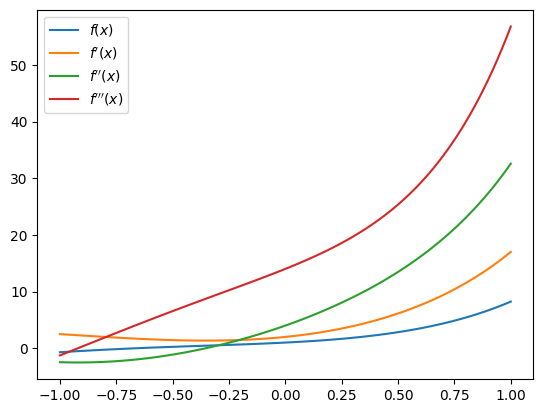

In [5]:
import matplotlib.pyplot as plt

X = np.linspace(-1, 1, 101)
plt.plot(X, f_num(X),    label=r'$f(x)$')
plt.plot(X, fp_num(X),   label=r"$f'(x)$")
plt.plot(X, fpp_num(X),  label=r"$f''(x)$")
plt.plot(X, fppp_num(X), label=r"$f'''(x)$")

plt.legend()

### Pros and Cons

Symbolic differentiation is useful because it provides:
* Exact results:
  no approximation or rounding errors (until it is evaluated with
  floating point numbers).
* Validity across the domain:
  derivative formulas apply everywhere the function is defined.
* Analytical insight:
  exact expressions make it easier to solve ODEs, optimize functions,
  and manipulate formulas algebraically.

Symbolic differentiation also has important drawbacks:
* Expression growth:
  formulas can quickly become large and messy for complex functions.
* Computational cost:
  evaluating or simplifying derivatives can be expensive for
  high-dimensional systems.
* Limited applicability:
  not suitable when functions are given only by data, simulations, or
  black-box algorithms.

In such cases, numerical or automatic differentiation is usually the
better choice.

### Software Tools

Symbolic differentiation is supported in many systems:
* [`SymPy`](https://www.sympy.org/):
  An open-source Python library that provides capabilities for
  symbolic differentiation, integration, and equation solving within
  the Python ecosystem.
* [`Mathematica`](https://www.wolfram.com/mathematica/):
  A computational software developed by Wolfram Research, offering
  extensive symbolic computation features used widely in academia and
  industry.
* [`Maple`](https://www.maplesoft.com/):
  A software package designed for symbolic and numeric computing,
  providing powerful tools for mathematical analysis.
* [`Maxima`](https://maxima.sourceforge.io/):
  An open-source computer algebra system specializing in symbolic
  manipulation, accessible for users seeking free alternatives.

In [6]:
# HANDSON: Differentiate and Simplify
#
# Define f(x) = ln(x^2 + 1) exp(x).
# Use SymPy to compute f'(x), simplify it, and plot both
# f(x) and f'(x).


In [7]:
# HANDSON: Product of Many Functions
#
# Define f(x) = sin(x) cos(x) tan(x).
# Compute derivatives up to order 3.
# What happens to expression complexity?


## Finite Difference Methods

Numerical differentiation estimates the derivative of a function using
discrete data points.
Instead of exact formulas, it provides approximate values that are
especially useful when analytical derivatives are difficult or
impossible to obtain.
This flexibility makes numerical methods essential for handling
complex, empirical, or high-dimensional functions that appear in
scientific and engineering applications.

The most common numerical approach is the finite difference method,
which estimates derivatives by evaluating the function at nearby
points and forming ratios of differences.
These methods are simple to implement and widely used in practice.
The key idea is to approximate the derivative $f'(x)$ by sampling the
function at points around $x$.
The three elementary finite difference formulas are forward
difference, backward difference, and central difference.

### Forward Difference

The forward difference uses the function values at $x$ and $x+h$:
\begin{align}
  f'(x) \approx \frac{f(x+h) - f(x)}{h}.
\end{align}
This method is easy to implement.
Assuming $f(x)$ is already available, it requires only one extra
function evaluation.
However, it introduces a **truncation error** of order
$\mathcal{O}(h)$.
While decreasing $h$ improves accuracy, making $h$ too small causes
floating-point **round-off errors** to dominate.

### Backward Difference

The backward difference uses values at $x$ and $x-h$:
\begin{align}
  f'(x) \approx \frac{f(x) - f(x-h)}{h}.
\end{align}
This has the same truncation error of order $\mathcal{O}(h)$ as the
forward method.
It is particularly useful when values of $f(x+h)$ are unavailable or
expensive to compute.

### Central Difference

The central difference combines forward and backward differences to
achieve higher accuracy:
\begin{align}
  f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}.
\end{align}
This method has a truncation error of order $\mathcal{O}(h^2)$, making
it significantly more accurate for smooth functions.
The trade-off is that it requires two extra function evaluations (not
at $x$) instead of one, but the improved accuracy often makes it the
preferred method.


### Truncation Error vs. Round-Off Error

Finite difference methods must balance two sources of error:
* **Truncation error** comes from approximating the derivative using a
  discrete difference.
* **Round-off error** comes from the finite precision of
  floating-point arithmetic.

For forward and backward differences, truncation error decreases
linearly with $h$.
For central differences, it decreases quadratically, giving better
accuracy for small $h$.

However, if $h$ becomes too small, round-off error dominates because
the difference $f(x+h) - f(x)$ may be nearly indistinguishable in
floating-point representation.
Hence, we may be facing catastrophic cancellation as before.

The optimal choice of $h$ balances these two errors.
A common rule of thumb is to set
\begin{align}
  h \sim \sqrt{\epsilon},
\end{align}

where $\epsilon$ is the machine epsilon that we learned before.
I.e., the smallest number such that $1 + \epsilon > 1$ in
floating-point arithmetic.

### Sample Codes

Below we implement the three basic finite-difference formulas
(forward, backward, and central) and demonstrate their behavior on a
smooth test function.
We will also run a convergence study to see how truncation error
(improves as $h$ goes smaller) and round-off error (gets worse as $h$
goes smaller) trade off in practice.

In [8]:
# Test function and its exact derivative
f  = lambda x: np.sin(x)
fp = lambda x: np.cos(x)

# Basic finite-difference formulas
def fp_forward(f, x, h):
    return (f(x+h) - f(x)) / h

def fp_backward(f, x, h):
    return (f(x) - f(x-h)) / h

def fp_central(f, x, h):
    return (f(x+h) - f(x-h)) / (2*h)

We pick a moderate step size $h$ and compare forward/backward/central
differences against the analytic derivative.
Central differences are usually much more accurate for smooth
functions.

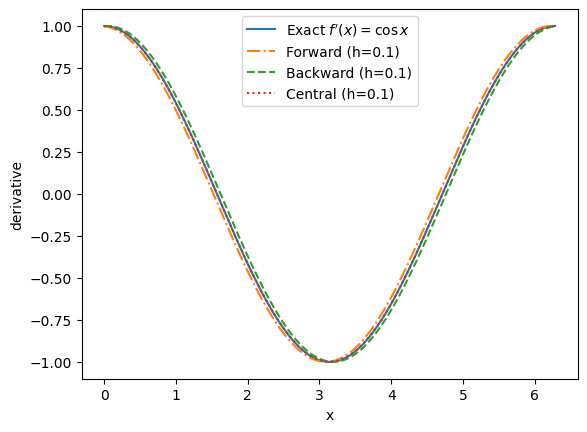

In [9]:
X = np.linspace(0, 2*np.pi, 201)
h = 0.1  # "reasonable" step for visual comparison

plt.plot(X, fp(X),                      label=r"Exact $f'(x)=\cos x$")
plt.plot(X, fp_forward (f, X, h), '-.', label=f'Forward (h={h:g})')
plt.plot(X, fp_backward(f, X, h), '--', label=f'Backward (h={h:g})')
plt.plot(X, fp_central (f, X, h), ':',  label=f'Central (h={h:g})')

plt.xlabel('x')
plt.ylabel('derivative')
plt.legend()

In [10]:
# HANDSON: Adjust `h` in the above cell and observe how the finite
#          difference methods behave


Next, we perform a convergence study, i.e., how error changes with
step size.
We fix a point $x_0$ and sweep $h$ over many orders of magnitude.

In [11]:
def errors(f, fp_exact, x0):
    # Step sizes spanning many orders of magnitude
    H  = np.logspace(0, -16, 17)  # start at 1 down to 1e-16
    fp = fp_exact(x0)

    Ef = np.abs(fp_forward (f, x0, H) - fp)
    Eb = np.abs(fp_backward(f, x0, H) - fp)
    Ec = np.abs(fp_central (f, x0, H) - fp)

    return H, Ef, Eb, Ec

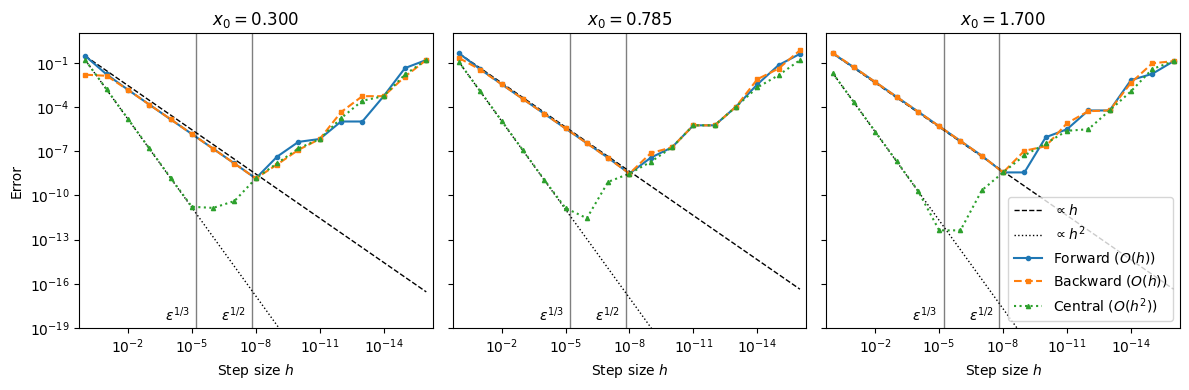

In [12]:
# Compare at a few points to see behavior across the domain
X0  = [0.3, np.pi/4, 1.7]
eps = np.finfo(float).eps

fig, axes = plt.subplots(1, len(X0), figsize=(12,4), sharey=True)
for ax, x0 in zip(axes, X0):
    H, Ef, Eb, Ec = errors(f, fp, x0)

    # Reference slopes: h and h^2 (scaled to match error at largest h for readability)
    s1 = Ef[0]/H[0]  # scale so line ~ same level at left
    s2 = Ec[0]/(H[0]**2)

    ax.loglog(H, s1*H,    'k--', lw=1, label=r'$\propto h$')
    ax.loglog(H, s2*H**2, 'k:',  lw=1, label=r'$\propto h^2$')

    ax.loglog(H, Ef, 'o-',  ms=3, label='Forward ($O(h)$)')
    ax.loglog(H, Eb, 's--', ms=3, label='Backward ($O(h)$)')
    ax.loglog(H, Ec, '^:' , ms=3, label='Central ($O(h^2)$)')

    ax.set_title(f'$x_0 = {x0:.3f}$')
    ax.set_ylim(1e-19, 1e+1)
    ax.set_xlim(max(H)*2, min(H)/2)
    ax.set_xlabel(r'Step size $h$')

    # A helpful visual: round-off typically appears near sqrt(eps)
    ax.axvline(eps**(1/2), color='k', alpha=0.5, lw=1)
    ax.text(eps**(1/2)*2, ax.get_ylim()[0]*2, r'$\epsilon^{1/2}$',
            va='bottom', ha='right', color='k')

    ax.axvline(eps**(1/3), color='k', alpha=0.5, lw=1)
    ax.text(eps**(1/3)*2, ax.get_ylim()[0]*2, r'$\epsilon^{1/3}$',
            va='bottom', ha='right', color='k')

axes[0].set_ylabel('Error')
axes[2].legend(loc='lower right', ncol=1)
plt.tight_layout()

From the plot above, we observe that
* For **large** $h$, **truncation error** dominates:
  error scales like $\mathcal{O}(h)$ (forward/backward) or
  $\mathcal{O}(h^2)$ (central).
* For **small** $h$, **round-off error** dominates:
  subtractive cancellation makes the difference $f(x+h)-f(x)$ noisy,
  so error grows.

The "best" $h$ is somewhere in the middle (often near
$\epsilon^{1/(n+1)}$ for $n$th-order methods), where total error is
minimized.
However, this depends on the local scales of $f, f'', f'''$, etc.

In [13]:
# HANDSON: Change `x0` and observe how the convergence plots change.
#          Specifically, what if `x0 = 0`?


In [14]:
# HANDSON: Find your optimal `h` at different points.
#          In the convergence plot, read off the $h$ where each curve
#          reaches its minimum.
#          How does it change with the local behavior of $f(x)$?


In [15]:
# HANDSON: Find your optimal `h` for different functions.
#          Specifically, replace $f(x)$ by $e^{-x^2}$ or $e^{3x}$.
#          How do the error curves change?
#          Which methods are more robust?


In [16]:
# HANDSON: Probe subtraction error.
#          For a fixed tiny `h=10e-12`, evaluate `(f(x+h)-f(x))/h`
#          as `x0` varies.
#          Where does the error spike?
#          Why?


### "High-Order Finite Differences" as in High-Order Schemes

High-order finite differences improve the accuracy order of a
derivative approximation by combining more sample points and
cancelling lower-order error terms via Taylor expansions.

This should not be confused with computing higher-order derivatives
(e.g., $f''$, $f^{(3)}$) that we will see later.
Here, we still approximate a first derivative $f'(x)$, but with
higher-order accuracy.

To derive high-order finite difference approximations, the standard
method is to use Taylor series expansion of the function around the
point of interest.
By considering multiple points symmetrically distributed around the
target point, it is possible to eliminate lower-order error terms,
thereby increasing the accuracy of the derivative approximation.

Specifically, consider approximating the first derivative $f'(x)$ with
fourth-order accuracy.
This requires that the truncation error be of order
$\mathcal{O}(h^4)$.
Expand the function $f$ at points $x - 2h$, $x - h$, $x + h$, and $x +
2h$ using the Taylor series around $x$:
\begin{align}
  f(x - 2h) &= f(x) - 2h f'(x) + \frac{(2h)^2}{2} f''(x) - \frac{(2h)^3}{6} f'''(x) + \frac{(2h)^4}{24} f''''(x) + \mathcal{O}(h^5), \\
  f(x -  h) &= f(x) -  h f'(x) + \frac{  h ^2}{2} f''(x) - \frac{  h ^3}{6} f'''(x) + \frac{  h ^4}{24} f''''(x) + \mathcal{O}(h^5), \\
  f(x +  h) &= f(x) +  h f'(x) + \frac{  h ^2}{2} f''(x) + \frac{  h ^3}{6} f'''(x) + \frac{  h ^4}{24} f''''(x) + \mathcal{O}(h^5), \\
  f(x + 2h) &= f(x) + 2h f'(x) + \frac{(2h)^2}{2} f''(x) + \frac{(2h)^3}{6} f'''(x) + \frac{(2h)^4}{24} f''''(x) + \mathcal{O}(h^5).
\end{align}

We will construct linear combinations of these expansions to eliminate
the lower-order terms up to $h^3$.
For example, subtract the expansion at $x - 2h$ from that at $x + 2h$
and adjust coefficients to isolate $f'(x)$:
\begin{align}
  f(x + 2h) - f(x - 2h) &= 4h f'(x) + \frac{8h^3}{3} f'''(x) + \mathcal{O}(h^5), \\
  f(x +  h) - f(x -  h) &= 2h f'(x) + \frac{h^3}{3} f'''(x) + \mathcal{O}(h^5).
\end{align}

It is now straightforward to eliminate the $f'''(x)$ term:
\begin{align}
  -f(x + 2h) + f(x - 2h) + 8f(x + h) - 8f(x - h) = 12h f'(x)  + \mathcal{O}(h^5).
\end{align}

Solving for $f'(x)$:
\begin{align}
  f'(x) \approx \frac{-f(x + 2h) + 8f(x + h) - 8f(x - h) + f(x - 2h)}{12h} + \mathcal{O}(h^4).
\end{align}
This leads to the fourth-order central difference formula for the first derivative.

In [17]:
def fp_central4(f, x, h):
    return (-f(x+2*h) + 8*f(x+h) - 8*f(x-h) + f(x-2*h))/(12*h)

In [18]:
def errors(f, fp_exact, x0):
    # Step sizes spanning many orders of magnitude
    H  = np.logspace(0, -16, 17)  # start at 1 down to 1e-16
    fp = fp_exact(x0)

    Ef = np.abs(fp_forward (f, x0, H) - fp)
    Eb = np.abs(fp_backward(f, x0, H) - fp)
    Ec = np.abs(fp_central (f, x0, H) - fp)
    Ec4= np.abs(fp_central4(f, x0, H) - fp)

    return H, Ef, Eb, Ec, Ec4

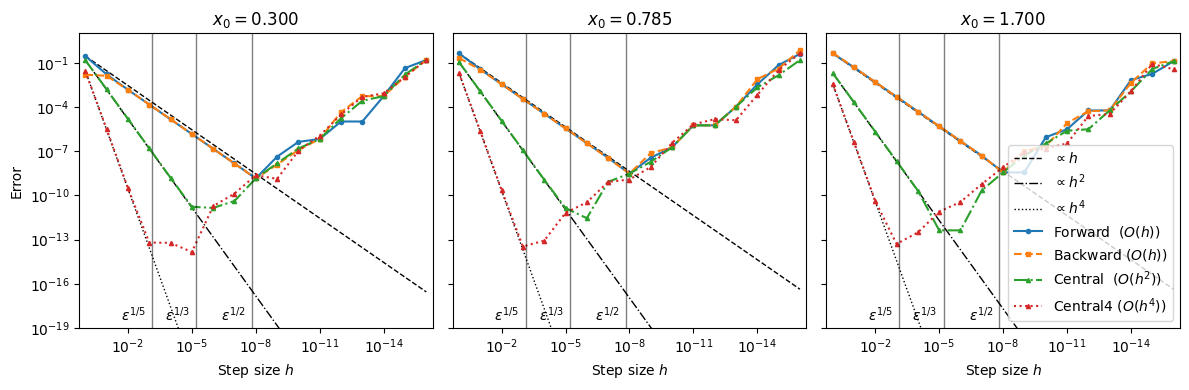

In [19]:
X0 = [0.3, np.pi/4, 1.7]

fig, axes = plt.subplots(1, len(X0), figsize=(12,4), sharey=True)
for ax, x0 in zip(axes, X0):
    H, Ef, Eb, Ec, Ec4 = errors(f, fp, x0)

    # Reference slopes: h and h^2 (scaled to match error at largest h for readability)
    s1 = Ef [0]/H[0]  # scale so line ~ same level at left
    s2 = Ec [0]/(H[0]**2)
    s4 = Ec4[0]/(H[0]**4)

    ax.loglog(H, s1*H,    'k--', lw=1, label=r'$\propto h$')
    ax.loglog(H, s2*H**2, 'k-.', lw=1, label=r'$\propto h^2$')
    ax.loglog(H, s4*H**4, 'k:',  lw=1, label=r'$\propto h^4$')

    ax.loglog(H, Ef, 'o-',  ms=3, label='Forward  ($O(h)$)')
    ax.loglog(H, Eb, 's--', ms=3, label='Backward ($O(h)$)')
    ax.loglog(H, Ec, '^-.', ms=3, label='Central  ($O(h^2)$)')
    ax.loglog(H, Ec4,'^:' , ms=3, label='Central4 ($O(h^4)$)')

    ax.set_title(f'$x_0 = {x0:.3f}$')
    ax.set_ylim(1e-19, 1e+1)
    ax.set_xlim(max(H)*2, min(H)/2)
    ax.set_xlabel(r'Step size $h$')

    # A helpful visual: round-off typically appears near sqrt(eps)
    ax.axvline(eps**(1/2), color='k', alpha=0.5, lw=1)
    ax.text(eps**(1/2)*2, ax.get_ylim()[0]*2, r'$\epsilon^{1/2}$',
            va='bottom', ha='right', color='k')

    ax.axvline(eps**(1/3), color='k', alpha=0.5, lw=1)
    ax.text(eps**(1/3)*2, ax.get_ylim()[0]*2, r'$\epsilon^{1/3}$',
            va='bottom', ha='right', color='k')

    ax.axvline(eps**(1/5), color='k', alpha=0.5, lw=1)
    ax.text(eps**(1/5)*2, ax.get_ylim()[0]*2, r'$\epsilon^{1/5}$',
            va='bottom', ha='right', color='k')

axes[0].set_ylabel('Error')
axes[2].legend(loc='lower right', ncol=1)
plt.tight_layout()

Does the 4th-order scheme converge as expected?
* Yes, in the truncation regime (larger $h$) the error curve is
  parallel to $h^4$.
* No, for very small $h$, the curve turns upward due to round-off and
  subtractive cancellation in differences like $f(x+h)-f(x-h)$.
* The "sweet spot" for the 4th-order stencil often occurs near $h \sim
  \epsilon^{1/5}$, not as small as you might guess.

In [20]:
# HANDSON: Change `x0` and observe how the convergence plots change.
#          Specifically, what if `x0 = 0` or `x0 = np.pi/2`?


In [21]:
# HANDSON: Find your optimal `h` at different points.
#          In the convergence plot, read off the $h$ where each curve
#          reaches its minimum.
#          How does it change with the local behavior of $f(x)$?


In [22]:
# HANDSON: Find your optimal `h` for different functions.
#          Specifically, replace $f(x)$ by $e^{-x^2}$ or $e^{3x}$.
#          How do the error curves change?
#          Which methods are more robust?


In [23]:
# HANDSON: Probe subtraction error.
#          For a fixed tiny `h=10e-12`, evaluate the numerators
#          as `x0` varies.
#          Where does the error spike?
#          Why?


Notes that
* Tabulated coefficients for many high-order stencils (central and
  one-sided) are widely available and easy to implement.
* Orders above **6th** are rarely useful in floating-point arithmetic
  because round-off and problem noise usually dominate before the
  asymptotic order helps.

### "High-Order Finite Differences" for Higher Derivatives

Finite differences extend naturally to higher derivatives.
A standard example is the second derivative using the central 3-point stencil.
Starting from Taylor expansions at $x \pm h$,
\begin{align}
  f(x+h) &= f(x) + h f'(x) + \tfrac{h^2}{2} f''(x) + \tfrac{h^3}{6} f^{(3)}(x) + \mathcal{O}(h^4),\\
  f(x-h) &= f(x) - h f'(x) + \tfrac{h^2}{2} f''(x) - \tfrac{h^3}{6} f^{(3)}(x) + \mathcal{O}(h^4),
\end{align}
adding eliminates the odd derivatives and gives
\begin{align}
  f(x+h) + f(x-h) = 2f(x) + h^2 f''(x) + \mathcal{O}(h^4),
\end{align}
so the 3-point central formula is
\begin{align}
  f''(x) \approx \frac{f(x+h) - 2f(x) + f(x-h)}{h^2} \quad\text{with error } \mathcal{O}(h^2).
\end{align}

Below we implement this stencil, compare to the exact derivative for
$f(x)=\sin x$ (so $f''(x)=-\sin x$), and run a convergence study.
We also include a 5-point, $\mathcal{O}(h^4)$ stencil for higher
accuracy.

In [24]:
# Test function and exact second derivative
f    = lambda x: np.sin(x)
fpp  = lambda x: -np.sin(x)

# 3-point central, O(h^2)
def fpp_central3(f, x, h):
    return (f(x+h) - 2*f(x) + f(x-h)) / (h**2)

# 5-point central, O(h^4)
def fpp_central5(f, x, h):
    return (-f(x+2*h) + 16*f(x+h) - 30*f(x) + 16*f(x-h) - f(x-2*h)) / (12*h**2)

We compare the numerical second derivative with the exact one on a
grid with a moderate step size $h$.
The 5-point stencil typically matches the exact curve noticeably
better for smooth functions.

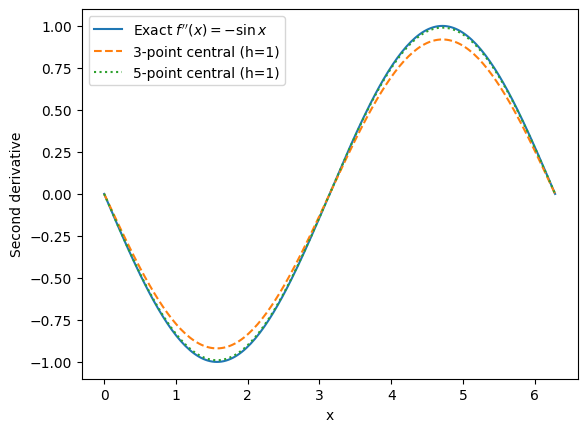

In [25]:
X = np.linspace(0, 2*np.pi, 201)
h = 1  # "reasonable" step for visual comparison

plt.plot(X, fpp(X),                      label=r"Exact $f''(x)=-\sin x$")
plt.plot(X, fpp_central3(f, X, h), '--', label=f'3-point central (h={h:g})')
plt.plot(X, fpp_central5(f, X, h), ':',  label=f'5-point central (h={h:g})')

plt.xlabel('x')
plt.ylabel('Second derivative')
plt.legend()

In [26]:
# HANDSON: Adjust `h` in the above cell and observe how the finite
#          difference methods behave


As with first derivatives, we perform a convergence study.
We fix a point $x_0$ and sweep $h$ over many orders of magnitude.

In [27]:
def error2s(f, fpp_exact, x0):
    # Step sizes spanning many orders of magnitude
    H   = np.logspace(0, -16, 17)  # start at 1 down to 1e-16
    fpp = fpp_exact(x0)

    E3 = np.abs(fpp_central3(f, x0, H) - fpp)
    E5 = np.abs(fpp_central5(f, x0, H) - fpp)

    return H, E3, E5

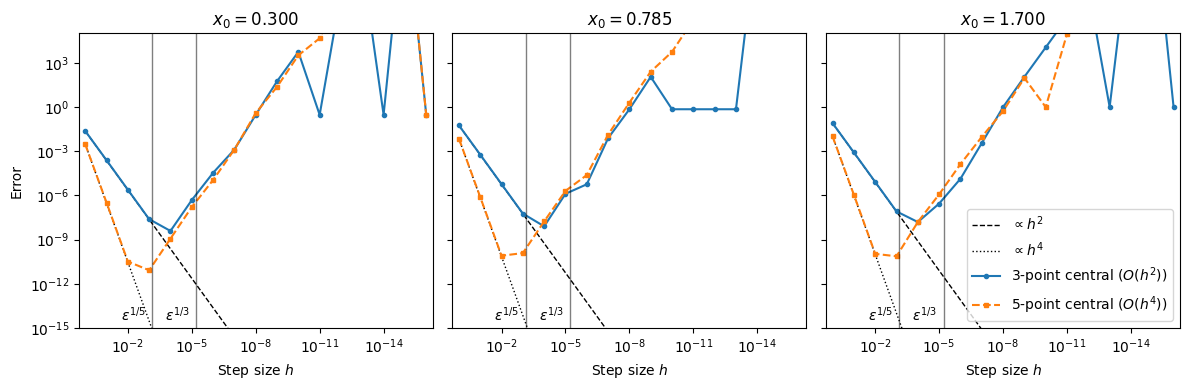

In [28]:
# Compare at a few points to see behavior across the domain
X0  = [0.3, np.pi/4, 1.7]
eps = np.finfo(float).eps

fig, axes = plt.subplots(1, len(X0), figsize=(12,4), sharey=True)
for ax, x0 in zip(axes, X0):
    H, E3, E5 = error2s(f, fpp, x0)

    # Reference slopes: h and h^2 (scaled to match error at largest h for readability)
    s2 = E3[0]/(H[0]**2)  # scale so line ~ same level at left
    s4 = E5[0]/(H[0]**4)

    ax.loglog(H, s2*H**2, 'k--', lw=1, label=r'$\propto h^2$')
    ax.loglog(H, s4*H**4, 'k:',  lw=1, label=r'$\propto h^4$')

    ax.loglog(H, E3, 'o-',  ms=3, label='3-point central ($O(h^2)$)')
    ax.loglog(H, E5, 's--', ms=3, label='5-point central ($O(h^4)$)')

    ax.set_title(f'$x_0 = {x0:.3f}$')
    ax.set_ylim(1e-15, 1e+5)
    ax.set_xlim(max(H)*2, min(H)/2)
    ax.set_xlabel(r'Step size $h$')

    # A helpful visual: round-off typically appears near sqrt(eps)
    ax.axvline(eps**(1/3), color='k', alpha=0.5, lw=1)
    ax.text(eps**(1/3)*2, ax.get_ylim()[0]*2, r'$\epsilon^{1/3}$',
            va='bottom', ha='right', color='k')
    
    ax.axvline(eps**(1/5), color='k', alpha=0.5, lw=1)
    ax.text(eps**(1/5)*2, ax.get_ylim()[0]*2, r'$\epsilon^{1/5}$',
            va='bottom', ha='right', color='k')

axes[0].set_ylabel('Error')
axes[2].legend(loc='lower right', ncol=1)
plt.tight_layout()

Just like for the first derivatives, why are the convergence plots not
perfect?
How do the truncation and round-off errors behave here?

In [29]:
# HANDSON: Change `x0` and observe how the convergence plots change.
#          Specifically, what if `x0 = 0` or `x0 = np.pi/2`?


In [30]:
# HANDSON: Find your optimal `h` at different points.
#          In the convergence plot, read off the $h$ where each curve
#          reaches its minimum.
#          How does it change with the local behavior of $f(x)$?


In [31]:
# HANDSON: Find your optimal `h` for different functions.
#          Specifically, replace $f(x)$ by $e^{-x^2}$ or $e^{3x}$.
#          How do the error curves change?
#          Which methods are more robust?


In [32]:
# HANDSON: Probe subtraction error.
#          For a fixed tiny `h=10e-12`, evaluate the numerators
#          as `x0` varies.
#          Where does the error spike?
#          Why?


## Spectral Derivatives (Fourier Method)

Spectral methods approximate derivatives by expanding a function in
global basis functions (e.g., Fourier modes).
For smooth, periodic functions, Fourier spectral methods often achieve
spectral (near-exponential) convergence, far outpacing finite
differences of any fixed order.

For a periodic function on $[-L/2, L/2)$,
\begin{align}
  f(x) = \sum_{n=-N/2}^{N/2-1} \widehat{f}_n e^{ik_n x},
  \qquad k_n=\frac{2\pi n}{L}.
\end{align}
Differentiation in $x$-space corresponds to multiplication in
$k$-space:
\begin{align}
  \widehat{f'}_n = (ik_n)\,\hat f_n,
  \qquad \widehat{f''}_n = (ik_n)^2\,\hat f_n,
  \qquad \text{etc.}
\end{align}
Thus, a numerical derivative is obtained by FFT, and then multiply by
$ik$, and then inverse FFT.

In [33]:
# Spectral derivative
def fp_spectral(func, X):
    F = func(X)
    G = np.fft.fft(F)
    K = 2 * np.pi * np.fft.fftfreq(len(X), d=X[1]-X[0])

    # Multiply by ik to get derivative in frequency domain
    Gp = 1j * K * G

    # Inverse Fourier transform to get derivative in spatial domain
    return np.fft.ifft(Gp).real

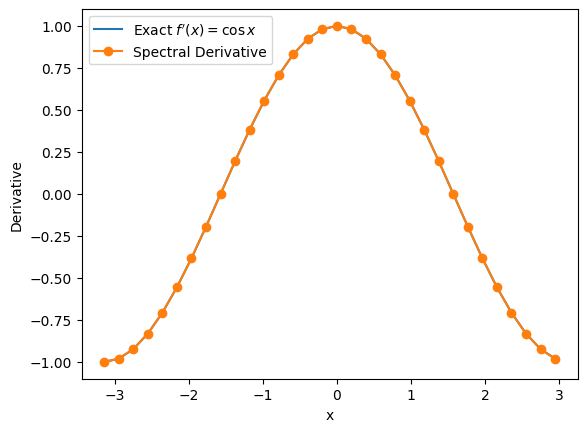

In [34]:
# Number of modes
N  = 32
L  = 2 * np.pi
X  = np.linspace(-L/2, L/2, N, endpoint=False)

plt.plot(X, fp(X),                   label=r"Exact $f'(x)=\cos x$")
plt.plot(X, fp_spectral(f, X), 'o-', label='Spectral Derivative')

plt.xlabel('x')
plt.ylabel('Derivative')
plt.legend()

Spectral method works so well for $f(x) = \sin x$ is not surprising.
It requires only a single Fourier mode to represent the function
exactly.
For other functions, note that the important assumptions:
* The function is periodic on the chosen interval.
  If not, its periodic extension may be discontinuous, which will lead
  to Gibbs oscillations and slow convergence.
* The sampling is uniform and we use the DFT/FFT grid.

In [35]:
# HANDSON: Create a convergence plot for spectral derivative.
#          I.e., to study the effect of resolution.


In [36]:
# HANDSON: What is the effect of the domain size?


In [37]:
# HANDSON: What if the function is not perfectly periodic or has
#          limited smoothness?
#          Try out functions:
#          1. Gaussian $\exp(-x^2/2)$
#          2. Lorentzian $1/(1+x^2)$
#          3. Discontinuous functions


## Complex-Step Differentiation

The complex-step method computes derivatives by evaluating the
function at a complex perturbation $x+ih$ and reading the derivative
from the imaginary part.

Unlike finite differences, it avoids subtractive cancellation, so you
can take very small $h$ without round-off blowup.
For analytic functions (holomorphic in a neighborhood of $x$) that
accept complex inputs, complex-step gives derivatives with near
machine precision at modest cost.

Starting from the Taylor expansion for an analytic $f$:
\begin{align}
  f(x+ih)
  = f(x) + ih\,f'(x) - \frac{h^2}{2}f''(x) - i\frac{h^3}{6}f^{(3)}(x) + \cdots,
\end{align}
the imaginary part is
\begin{align}
  \operatorname{Im} f(x+ih) = h\,f'(x) - \frac{h^3}{6} f^{(3)}(x) + \mathcal{O}(h^5),
\end{align}
so
\begin{align}
  f'(x) \approx \frac{\operatorname{Im} f(x+ih)}{h}
  \quad\text{with error } \mathcal{O}(h^2).
\end{align}

Because there is no subtraction of nearly equal real values, there is
no catastrophic cancellation.
This typically allows using extremely small $h$ and achieving errors
near floating-point limits.

In [38]:
# Complex-step derivative
def fp_complexstep(f, x, h=1e-100):
    return np.imag(f(x + 1j*h)) / h

print(fp(x0))
print(fp_complexstep(f, x0))
print(abs(fp(x0) - fp_complexstep(f, x0)))

-0.12884449429552464
-0.12884449429552464
0.0


In [39]:
def errors(f, fp_exact, x0):
    # Step sizes spanning many orders of magnitude
    H  = np.logspace(0, -16, 17)  # start at 1 down to 1e-16
    fp = fp_exact(x0)

    Ef = np.abs(fp_forward    (f, x0, H) - fp)
    Eb = np.abs(fp_backward   (f, x0, H) - fp)
    Ec = np.abs(fp_central    (f, x0, H) - fp)
    Ec4= np.abs(fp_central4   (f, x0, H) - fp)
    Ecs= np.abs(fp_complexstep(f, x0, H) - fp)

    return H, Ef, Eb, Ec, Ec4, Ecs

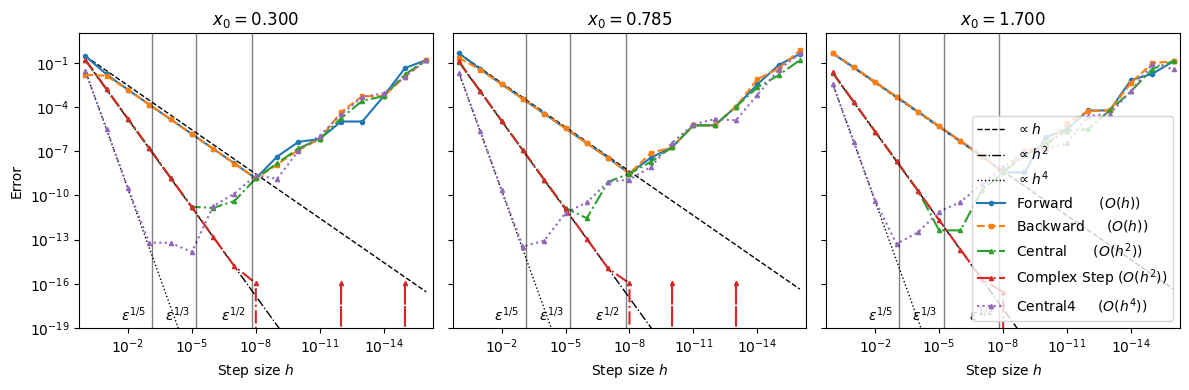

In [40]:
X0 = [0.3, np.pi/4, 1.7]

fig, axes = plt.subplots(1, len(X0), figsize=(12,4), sharey=True)
for ax, x0 in zip(axes, X0):
    H, Ef, Eb, Ec, Ec4, Ecs = errors(f, fp, x0)

    # Reference slopes: h and h^2 (scaled to match error at largest h for readability)
    s1 = Ef [0]/H[0]  # scale so line ~ same level at left
    s2 = Ec [0]/(H[0]**2)
    s4 = Ec4[0]/(H[0]**4)

    ax.loglog(H, s1*H,    'k--', lw=1, label=r'$\propto h$')
    ax.loglog(H, s2*H**2, 'k-.', lw=1, label=r'$\propto h^2$')
    ax.loglog(H, s4*H**4, 'k:',  lw=1, label=r'$\propto h^4$')

    ax.loglog(H, Ef, 'o-',  ms=3, label='Forward      ($O(h)$)')
    ax.loglog(H, Eb, 's--', ms=3, label='Backward     ($O(h)$)')
    ax.loglog(H, Ec, '^-.', ms=3, label='Central      ($O(h^2)$)')
    ax.loglog(H, Ecs,'^-.', ms=3, label='Complex Step ($O(h^2)$)')
    ax.loglog(H, Ec4,'^:' , ms=3, label='Central4     ($O(h^4)$)')

    ax.set_title(f'$x_0 = {x0:.3f}$')
    ax.set_ylim(1e-19, 1e+1)
    ax.set_xlim(max(H)*2, min(H)/2)
    ax.set_xlabel(r'Step size $h$')

    # A helpful visual: round-off typically appears near sqrt(eps)
    ax.axvline(eps**(1/2), color='k', alpha=0.5, lw=1)
    ax.text(eps**(1/2)*2, ax.get_ylim()[0]*2, r'$\epsilon^{1/2}$',
            va='bottom', ha='right', color='k')

    ax.axvline(eps**(1/3), color='k', alpha=0.5, lw=1)
    ax.text(eps**(1/3)*2, ax.get_ylim()[0]*2, r'$\epsilon^{1/3}$',
            va='bottom', ha='right', color='k')

    ax.axvline(eps**(1/5), color='k', alpha=0.5, lw=1)
    ax.text(eps**(1/5)*2, ax.get_ylim()[0]*2, r'$\epsilon^{1/5}$',
            va='bottom', ha='right', color='k')

axes[0].set_ylabel('Error')
axes[2].legend(loc='lower right', ncol=1)
plt.tight_layout()

Based on the above code, complex-step is a simple, robust way to get
high-accuracy first derivatives without round-off blowup.
Although it converges only at second order, an extremely small step
size $h$ can be used without introducing round-off errors.
As a result, it is often much more accurate in practice than other,
even higher-order, derivative methods.
For many smooth problems, complex-step delivers near machine-precision
accuracy with a single (complex) function evaluation per partial
derivative.

In [41]:
# HANDSON: Replace `f` with `lambda x: np.abs(x)` or a function with
#          `np.maximum(x)`.
#          What happens and why?


In [42]:
# HANDSON: Compare methods.
#          For a smooth function, compare complex-step, central,
#          and 4th-order central at several points.
#          Which reaches the lowest error for a given evaluation
#          budget?


Note however the requirements and caveats:
* $f$ must be analytic near $x$ and implemented so that it accepts
  complex inputs.
  Non-analytic operations (e.g., `abs`, `max`, branching on the sign of
  $x$) can break the method.
* Some libraries or user-defined code may not propagate complex types.

## Automatic Differentiation

Automatic Differentiation (AD) is a computational technique that
computes exact derivatives up to machine precision by systematically
applying the chain rule at the level of elementary operations.

Unlike symbolic differentiation, which manipulates algebraic
expressions, and numerical differentiation, which approximates
derivatives with finite differences, AD directly tracks derivatives
during computation.
This avoids the expression growth problem of symbolic methods and the
round-off/truncation errors of finite differences.

AD has become indispensable in modern scientific computing,
optimization, and machine learning, where accurate gradient
information is critical.

AD operates in two main modes:
* Forward mode:
  efficient when the number of inputs is small and the number of
  outputs is large.
* Reverse mode:
  efficient when the number of outputs is small and the number of
  inputs is large (this is the mode used in deep learning).

### Dual Numbers and Forward Mode AD

Forward mode AD can be understood using dual numbers, a simple but
powerful extension of real numbers.
A dual number is written as:
\begin{align}
  \tilde{x} = x + \delta x',
\end{align}
where:
* $x$ is the real part (the function value),
* $x'$ is the dual part, which is the derivative, and
* $\delta$ is an infinitesimal number with the special property
  $\delta^2 = 0$.

This algebra means that higher-order terms vanish, leaving only the
first derivative information.
For example:
\begin{align}
  (x + \delta x')(y + \delta y') = xy + \delta (x y' + x' y).
\end{align}

Notice that the derivative naturally follows from the multiplication
rule, and similar results hold for all other operations (addition,
division, sin, exp, etc.).

This is precisely what forward mode AD does: it propagates both values
and derivatives through the computation using the chain rule.

```{note} Connection to Mathematics

The rule $\delta^2 = 0$ mirrors the algebra in 
[exterior calculus](https://en.wikipedia.org/wiki/Differential_form),
where $d^2 = 0$.
Both express the fact that applying two infinitesimal changes
successively gives zero contribution at first order.
```

### Example: Differentiating $f(x) = x^2$

Consider the function $f(x) = x^2$.
Using dual numbers:
\begin{align}
\tilde{x} &= x + \delta, \\
\tilde{f}(\tilde{x}) &= (x + \delta)^2 = x^2 + 2x\delta + \delta^2 = x^2 + 2x\delta.
\end{align}
Since $\delta^2 = 0$, the dual part of $\tilde{f}(\tilde{x})$ is $2x$,
which is the derivative $f'(x)$.

### Implementing Autodiff with Dual Numbers

To implement forward mode AD in Python, we can define a `Dual` class
that overrides arithmetic operations to handle both the value and
derivative parts.
Additionally, we introduce helper functions `V(x)` and `D(x)` to
extract the value and derivative from Dual Numbers or regular
numerical inputs.

In [43]:
def V(x):
    """Select the value from a dual number.

    Work for both python built-in numbers (often used in function) and dual numbers.
    """
    if isinstance(x, Dual):
        return x[0]
    else:
        return x

def D(x):
    """Select the derivative from a dual number.

    Work for both python built-in numbers (often used in function) and dual numbers.
    """
    if isinstance(x, Dual):
        return x[1]
    else:
        return 0

In [44]:
class Dual(tuple):
    """Dual number for implementing autodiff in pure python"""

    def __new__(self, v, d=1):  # tuple is immutable so we cannot use __init__()
        return tuple.__new__(Dual, (v, d))

    def __add__(self, r):
        return Dual(
            V(self) + V(r),
            D(self) + D(r),
        )
    def __radd__(self, l):
        return self + l  # addition commutes

    def __sub__(self, r):
        return Dual(
            V(self) - V(r),
            D(self) - D(r),
        )
    def __rsub__(self, l):
        return Dual(
            V(l) - V(self),
            D(l) - D(self),
        )

    def __mul__(self, r):
        return Dual(
            V(self) * V(r),
            D(self) * V(r) + V(self) * D(r),
        )
    def __rmul__(self, l):
        return self * l  # multiplication commutes

    def __truediv__(self, r):
        return Dual(
            V(self) / V(r),
            ...,  # leave as HANDSON
        )
    def __rtruediv__(self, l):
        return Dual(
            V(l) / V(self),
            ...,  # leave as HANDSON
        )

    def __pow__(self, r): # assume r is constant
        if r == 0:
            return ...  # leave as HANDSON
        elif r == 1:
            return ...  # leave as HANDSON
        else:
            return Dual(
                V(self)**r,
                ...,  # leave as HANDSON
            )

That's it!
We've implemented (a limited version of) autodiff in pure python!

To validate our Dual Number implementation, we define a simple
function and compute its derivative using AD.
Consider the function $f(x) = x + x^2$.
We evaluate this function using Dual Numbers and plot both the
function and its derivative.

Text(0, 0.5, 'f(x)')

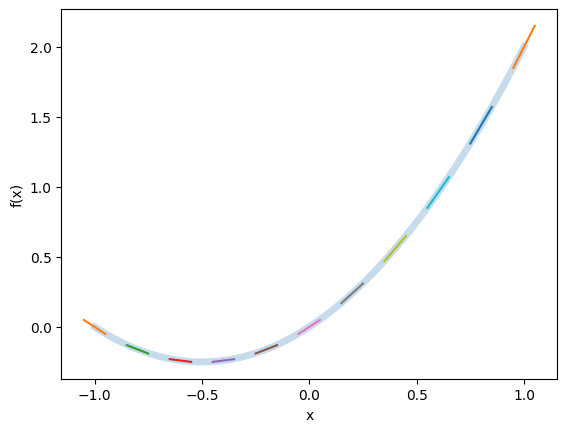

In [45]:
def f(x):
    return x + x*x

X     = np.linspace(-1,1,num=11)
F, Fp = f(Dual(X))

Xd = np.linspace(min(X), max(X), num=1001)
Fd = [f(x) for x in Xd]
    
plt.plot(Xd, Fd, lw=5, alpha=0.25)
for (x, fp) in zip(X, Fp):
    y = f(x)
    plt.plot(
        [x-0.05,    x+0.05],
        [y-0.05*fp, y+0.05*fp],
    )

plt.xlabel('x')
plt.ylabel('f(x)')

The initial implementation of the Dual class handles basic arithmetic
operations.
However, to support more complex functions such as trigonometric
functions, we need to define additional operations that correctly
propagate derivative information.
This can be achieved by implementing helper functions that operate on
Dual Numbers.

In [46]:
def sin(x):
    return Dual(
        np.sin(V(x)),
        np.cos(V(x)) * D(x)  # chain rule: d/dx sin(x) = cos(x) * x'
    )

Text(0, 0.5, 'f(x)')

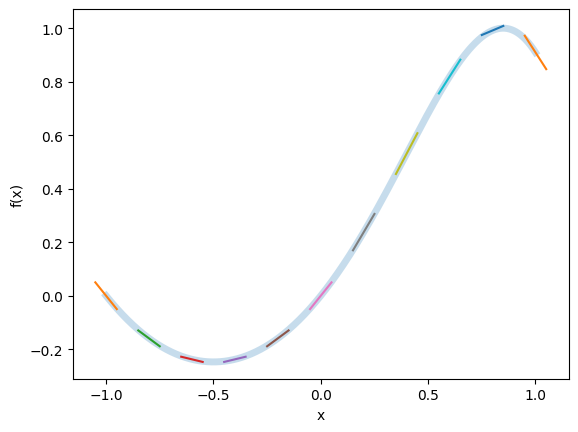

In [47]:
def f(x):
    return sin(x + x*x)

X     = np.linspace(-1, 1, 1001)
F, Fp = f(Dual(X))

plt.plot(X, F, lw=5, alpha=0.25)
for (x, f, fp) in list(zip(X, F, Fp))[::100]:
    plt.plot(
        [x-0.05,    x+0.05],
        [f-0.05*fp, f+0.05*fp],
    )

plt.xlabel('x')
plt.ylabel('f(x)')

In [48]:
# HANDSON: test the accuracy of Dual number autodiff.
#          Does it reach machine accuracy?


In [49]:
# HANDSON: implement __truediv__() and __rtruediv__() in `Dual` to
#          support division.
#          Test it with functions like the Lorentzian $1/(1+x^2)$.


In [50]:
# HANDSON: implement __pow__() in `Dual` and test it.


### Connection to the Complex Step Method

While the function implementation looks different, the dual number
formulation is computationally very similar to the complex-step method
we discussed earlier.
Both approaches introduce an extra component, either a dual part
($\delta$) or an imaginary part ($i$), to carry derivative information
without large numerical errors.

In the Complex Step Method, we evaluate the function at a perturbed
point $x + i h$, where $h$ is a small real step size:
\begin{align}
  f(x + i h) = (x + i h)^2 = x^2 - h^2 + 2 i h x.
\end{align}

The imaginary part directly gives the derivative:
\begin{align}
  f'(x) \approx \frac{\operatorname{Im}[f(x + i h)]}{h} = 2x.
\end{align}

The real part includes an extra term $-h^2$, which becomes negligible
when $h$ is sufficiently small.
In fact, for $h < \sqrt{\epsilon}$, where $\epsilon$ is the machine
precision, this term vanishes due to round-off limitations.
Thus, we expect the "real part" of a complex step operation would
match the real part of a Dual number.
In other words, when the step size is chosen carefully, the complex
step method essentially behaves like the dual number formulation.

### Reverse Mode AD

Forward mode AD, as we saw with dual numbers, is most efficient when a
function has only a few inputs.
However, when there are many inputs but only a single output, reverse
mode AD becomes much more powerful.
This is exactly the case in machine learning, where models may contain
millions of parameters but the objective is often to minimize a single
scalar loss function.

The key idea of reverse mode AD is to build a computational graph that
records the sequence of operations performed during the forward
evaluation of the function.
Once the function value has been computed, the graph is traversed
backward, propagating sensitivities (gradients) from the output back
to the inputs.
At each step, the chain rule is applied systematically, allowing the
derivative with respect to every input to be obtained in a single
backward pass.
This process is commonly known as
[backpropagation](https://en.wikipedia.org/wiki/Backpropagation).

In practice, reverse mode AD requires storing or recomputing
intermediate values from the forward pass, which can be memory
intensive.
Modern machine learning frameworks such as
[TensorFlow](https://www.tensorflow.org/),
[PyTorch](https://pytorch.org/), and
[JAX](https://docs.jax.dev/)
implement reverse mode efficiently by combining graph-based
differentiation with optimizations like checkpointing, where only a
subset of intermediate results are stored and the rest are recomputed
as needed.

### Autodiff (with Vectorization and JIT) in Python using JAX

[JAX](https://docs.jax.dev) is a high-performance numerical computing
library developed by Google.
It extends the familiar NumPy API with powerful tools for automatic
differentiation (AD).
This makes it especially useful in machine learning, optimization, and
scientific computing.
One of JAX's strengths is that it combines ease of use with
Just-In-Time (JIT) compilation and allows Python code to be executed
efficiently on CPUs and GPUs.

Key features of JAX includes:
* Automatic Differentiation:
  JAX supports both forward and reverse mode AD, enabling efficient
  computation of derivatives, gradients, Jacobians, and Hessians.
* JIT Compilation:
  Through XLA (Accelerated Linear Algebra), JAX can compile Python
  functions into optimized machine code, often yielding dramatic
  speedups.
* Vectorization:
  With the function `vmap`, JAX makes it easy to apply functions
  across entire arrays without writing explicit loops.
* Composability and Interoperability:
  JAX code looks and feels like NumPy.
  Minimal changes are needed to benefit from AD, vectorization, or
  JIT, and these transformations can be composed seamlessly.

To install JAX on a CPU-only system, use:
```bash
pip install --upgrade "jax[cpu]"
```

For GPU acceleration, the installation requires CUDA-enabled builds.
See the
[JAX documentation](https://docs.jax.dev/en/latest/installation.html)
for details.

Let's demonstrate how to use JAX to compute and visualize derivatives.

In [51]:
!pip install jax

Text(0, 0.5, 'f(x)')

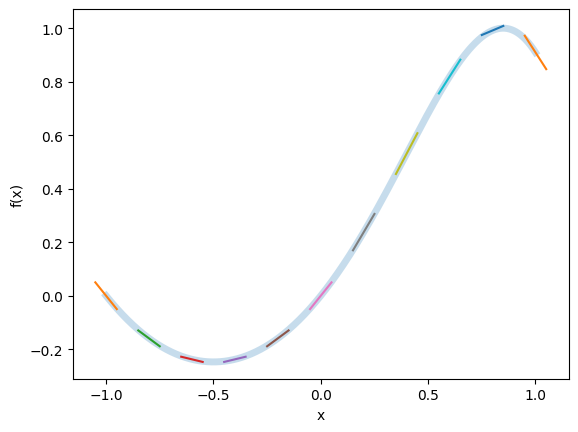

In [52]:
from jax import numpy as jnp, grad, vmap

# Define the function
def f(x):
    return jnp.sin(x + x*x)

# Grid of input points
X = jnp.linspace(-1, 1, num=1001)

# Evaluate function and derivative
F  = f(X)
Fp = vmap(grad(f))(X)

# Plot function and tangent lines
plt.plot(X, F, lw=5, alpha=0.25)
for (x, f, fp) in list(zip(X, F, Fp))[::100]:
    plt.plot(
        [x-0.05,    x+0.05],
        [f-0.05*fp, f+0.05*fp],
    )

plt.xlabel('x')
plt.ylabel('f(x)')

This example shows how seamlessly JAX can compute derivatives and
apply them across entire arrays.
The combination of autodiff, vectorization (`vmap`), and JIT
compilation (`jit`) makes JAX an exceptionally powerful tool for
large-scale scientific computing.

In [53]:
# HANDSON: test out different JAX features


In [54]:
# HANDSON: benchmark JAX with NumPy, especially on machines with GPUs.
#          Does `jit` make your code faster?


## Summary

Differentiation is one of the most fundamental tools in mathematics,
science, and engineering.
It enables the analysis of functions, the modeling of physical
systems, and the optimization of complex problems.
Today, we explored several approaches to computing derivatives, each
with its own advantages and limitations.

Symbolic Differentiation produces exact analytical expressions and is
ideal for theoretical work.
However, it often suffers from expression growth and can become
computationally impractical for large or complex problems.

Numerical Differentiation (finite differences and spectral difference)
provides a simple and flexible way to approximate derivatives using
sampled function values.
Its main challenge is balancing truncation error (improved with
smaller step sizes) against round-off error (which grows with very
small steps).
Choosing an optimal step size is essential for stable results.

Complex Step Differentiation avoids the round-off error problem by
perturbing the input in the imaginary direction.
It achieves machine-precision accuracy for smooth functions and is, in
fact, numerically equivalent to the dual number formulation used in
forward mode AD when the step size is sufficiently small.

Automatic Differentiation (AD) bridges symbolic and numerical
approaches by applying the chain rule systematically through a
computational graph.
It delivers exact derivatives up to machine precision without symbolic
manipulation.
* Forward mode AD (e.g., via dual numbers) is efficient when there are
  few inputs.
* Reverse mode AD (backpropagation) is ideal for problems with many
  inputs but only a single output, such as neural network training.


Although powerful, AD can be memory-intensive and requires careful
handling of non-differentiable functions and dynamic control flow.

Current research continues to push AD toward greater scalability for
large models, efficient computation of higher-order derivatives
(Jacobians, Hessians), and robust handling of non-differentiable
functions and dynamic graphs.
Future progress may come from hybrid approaches that combine the
strengths of symbolic, numerical, and automatic differentiation.

For more information, please look into:
* [SymPy Documentation](https://www.sympy.org/en/index.html)
* [Numerical Recipes](https://numerical.recipes/)
* [JAX Documentation](https://jax.readthedocs.io/en/latest/)
